# Programming Fundamentals - Project
## GMIT Data Analytics 2020
## Cian Hogan
***

# Project Propostiton

Create sample data of call centre NPS scores.

Dependant variable- Call centre NPS

independant variable- Agent experience/skill, High-Medium-Low

wait times - 0-∞ (centering around a mean value)

issue resolved - Bool Yes/No




## Simulate call centre data
***

We are attempting to generate sample call centre statistics. The four variables that we are going to look at are wait time before the call is answered **waitTime**, experience level of the customer service agent **agentExp**, whether the customers issue was resolved **issueRes** and the net promoter score **NPS**. The first 3 variables are considered independant as the outcome of one does not change the outcome of another. *It could be argued that agent experience could affect the rate at which issues are resolved but in this case we are going to assume they are independant and that issue resolution is based entirely on the customers issue itself.*

The key variable that we will look at is **NPS** or Net Promoter Score. We are assuming NPS is dependant on the other factors that we are measuring. If a customer has to wait a long time to speak to an agent, the less experienced the agent they speak with, and if the problem could not be resolved then we would expect the customer to be less likely to recommend the service to a friend or familly member.

# Introduction to NPS
***

NPS or Net Promoter Score is a metric used by compaines to measure their customer loyalty. A single survey question is used with the customer asked to choose a score between 0-10. A higher score is desirably for the company [1].

A standard NPS question may look like the below and would possible include a section where the customer can add free text comments:
```
On a scale of 0 to 10, how likely is it that you would recommend 
our [company, product, service] to a friend or colleague?
```

This NPS question is used as a way to measure customer loyalty which can be a good predictor of company growth. This can be used to quantify a compnaies potential to generate new business through word of mouth referral from customers [2]. 

To calculate an overall NPS score for a company you would bucket the responses they receive into 3 groups:
- 0-6: Detractors
- 7-8: Passive
- 9-10: Promoters

To calculate an overall score we minus the Detractors from the Promoters and divide by the total amount of responses to get a percentage score. In the below example 5 customers scored below 6, 5 customers scored 7 or 8 and 10 customers scored a 9 or 10. 

```
Promoters minus Detractors: 10 - 5 = 5
Result divided by total survey responses 5/20 = .25 or 25%
```

Even though half of the respondents gave a score of 9 or 10 the companies NPS score is only 25% when we account for the passive and negative scores they recieved. This is beacuse although enthusiasticly happy and loyal customers like our promoters help to drive growth, unhappy and disatisfied customers can damage the brand too [3]. The goal of the company should be to convert as many detractors and passive customers as possible to become promoters, increasing their overall NPS score and griving business growth through word of mouth marketing.

In [76]:
# Typical responses
detractors = 5
passive = 5
promoters = 10

nps = ((promoters-detractors)/(detractors+passive+promoters))*100
print(nps)


25.0


# Wait Time
***
The first variable that we are going to look at in detail is **Customer Wait Time** which we define by how long the customer is on the phone before they are connected to an agent.

In [2]:
import numpy as np
import pandas as pd

We write a function that can generate some sample average customer wait times using the poisson distribution in numpys random package. 

In [3]:
def waitTime(avg, n=1):
    rng = np.random.default_rng()
    
    wait = rng.poisson(lam=avg, size=n)
    
    return wait        

We write a function that can generate whether the call in connected to an agent with high or low experience.

In [4]:
def agentExp(perc, n=1):
    
    rng = np.random.default_rng()
    
    agent = rng.choice(a=["low", "high"], p=perc, size=n)
    
    return agent

We write a function that assigns whether a calls issue is resolved or not based on an average resolution rate.

In [5]:
def issueRes(avgRate, n=1):
    
    rng = np.random.default_rng()
    
    res = rng.choice(a=[True, False], p=[avgRate, 1-avgRate], size=n)
    
    return res

We write a function that uses the 3 functions we wrote earlier to generate a pandas dataframe of 3 variables.

In [6]:
def callData(nCalls, avgWait, agentExp_perc, avgRes):
    
    data = pd.DataFrame()
    
    wait = waitTime(n=nCalls, avg=avgWait)
    
    data["Wait time"] = wait
    
    agent = agentExp(perc=agentExp_perc, n=nCalls)
    
    data["Agent Exp"] = agent
    
    resolve = issueRes(avgRes, nCalls)
    
    data["Issue Resolved"] = resolve
    
    return data

We write a function that takes a 3var dataframe and generates a NPS score based on the variables in the dataframe 

In [7]:
def genNPS(df):
    
    rng = np.random.default_rng()
    
    NPSarr = []

    for item in df.itertuples(index=False):
        waitTime, agent, resolved = item[0], item[1], item[2]
        avgNPS = 10
    
        if not resolved:
            avgNPS -= 3
    
        if waitTime > 90:
            avgNPS -= 1
        
        if agent == "low":
            avgNPS -= 2
        
        NPS = rng.normal(avgNPS)
    
        if NPS > 10:
            NPS = 10
        
        NPSarr.append(int(NPS))
    
    df["NPS"] = NPSarr
    
    return df
    

We write a final function here which builds on the previous functions to build a total 4 var dataframe that encapsulates all the call data we are lloking to create.

In [8]:
def genData(calls, waitTime, agentPerc, avgRes):
    
    df = callData(nCalls=calls, avgWait=waitTime, agentExp_perc=agentPerc, avgRes=avgRes)
    
    data = genNPS(df)
    
    return data

## Generating Data

In [89]:
nps_df1 = genData(1000, waitTime = 120, agentPerc= [.50,.50], avgRes=.5)

In [10]:
print(nps_df1.head())

   Wait time Agent Exp  Issue Resolved  NPS
0        107       low            True    7
1        143       low           False    3
2        110       low            True    6
3        108      high            True    9
4        145      high            True    9


In [11]:
print(nps_df1.loc[:, "NPS"].mean())

5.863


In [91]:
nps_df2 = genData(1000, waitTime = 60, agentPerc= [.30,.70], avgRes=.75)

In [13]:
print(nps_df2.head())

   Wait time Agent Exp  Issue Resolved  NPS
0         60      high            True    9
1         51      high            True    9
2         84      high           False    6
3         78       low            True    7
4         66      high            True    9


In [14]:
print(nps_df2.loc[:, "NPS"] <=6)

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: NPS, Length: 1000, dtype: bool


In [15]:
NPS_score1 = (len(nps_df1.loc[nps_df1['NPS'] > 8]) - len(nps_df1.loc[nps_df1['NPS'] < 7]))/len(nps_df1)

In [16]:
print(NPS_score1)

-0.501


In [17]:
NPS_score2 = (len(nps_df2.loc[nps_df2['NPS'] > 8]) - len(nps_df2.loc[nps_df2['NPS'] < 7]))/len(nps_df2)

In [18]:
print(NPS_score2)

0.49


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
res_df = nps_df2.loc[nps_df2['Issue Resolved'] == True]
nores_df = nps_df2.loc[nps_df2['Issue Resolved'] == False]
print(res_df.head())

   Wait time Agent Exp  Issue Resolved  NPS
0         60      high            True    9
1         51      high            True    9
3         78       low            True    7
4         66      high            True    9
5         69      high            True   10


(array([  2.,   5.,   8.,  34.,   0.,  54., 128., 176., 257., 336.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

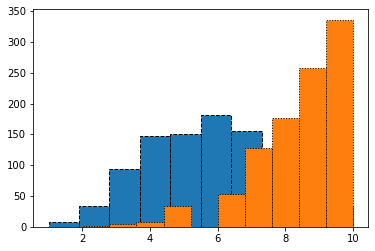

In [61]:
plt.hist(nps_df1.loc[:, "NPS"], ls="dashed", edgecolor="black", bins=10)
plt.hist(nps_df2.loc[:, "NPS"], ls="dotted", edgecolor="black", bins=10)

(array([  0.,   0.,   2.,   5.,   8.,  34.,  54., 128., 176., 593.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

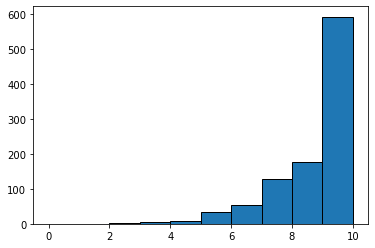

In [79]:
plt.hist(nps_df2.loc[:, "NPS"], edgecolor="black", bins=range(11))

(array([ 2.,  5.,  8.,  0., 28., 21.,  0., 29., 15.,  2.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <a list of 10 Patch objects>)

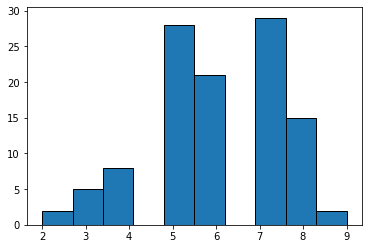

In [48]:
plt.hist(nores_df.loc[:, "NPS"], edgecolor="black", bins=10)

(array([  0.,   0.,   0.,   0.,   0.,   6.,  33.,  99., 161., 591.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

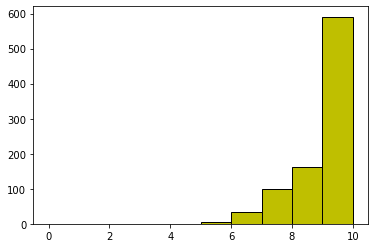

In [78]:
plt.hist(res_df.loc[:, "NPS"], edgecolor="black", bins=range(11), color='y')

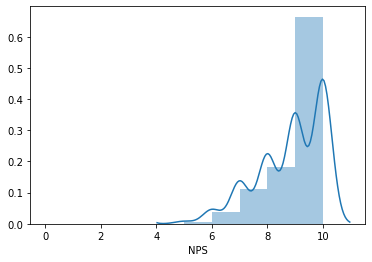

In [94]:
sns.distplot(res_df.loc[:, "NPS"], hist=True, bins=range(11))

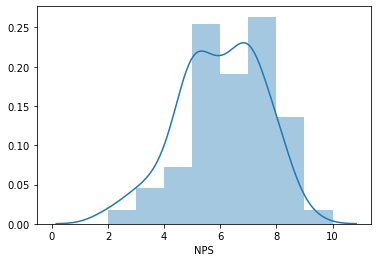

In [93]:
sns.distplot(nores_df.loc[:, "NPS"], hist=True, bins=range(11))

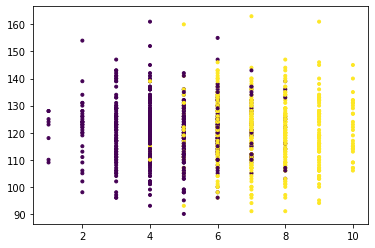

In [75]:
plt.scatter(nps_df1.loc[:, "NPS"], nps_df1.loc[:, "Wait time"], marker='.', c=nps_df1.loc[:, "Issue Resolved"])

(array([  0.,   0.,   1.,   7.,  33.,  55., 109., 167., 165., 463.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

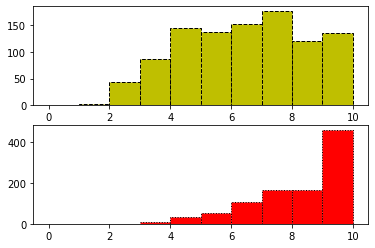

In [92]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,)

ax1.hist(nps_df1.loc[:, "NPS"], ls="dashed", edgecolor="black", bins=range(11), color="y")

ax2.hist(nps_df2.loc[:, "NPS"], ls="dotted", edgecolor="black", bins=range(11), color="r")




In [ ]:
plt.hist(nps_df1.loc[:, "NPS"], ls="dashed", edgecolor="black", bins=10)
plt.hist(nps_df2.loc[:, "NPS"], ls="dotted", edgecolor="black", bins=10)

# References

1. qualtrics.com. What is Net Promoter Score (NPS)? Everything you need to know https://www.qualtrics.com/uk/experience-management/customer/net-promoter-score/
2. Reichheld Frederich, (2003). The One Number You Need to Grow. https://hbr.org/2003/12/the-one-number-you-need-to-grow
3. Scorebuddy. How to Improve Customer Experience with NPS in Call Centers. https://blog.scorebuddyqa.com/improve-customer-experience-with-nps-call-centers




HBR https://hbr.org/2003/12/the-one-number-you-need-to-grow

Wait time https://www.callcentrehelper.com/is-there-a-correlation-between-queue-time-and-customer-satisfaction-levels-100270.htm

resolution https://stellaconnect.com/2018/05/27/first-contact-resolution-is-the-king-of-customer-service-metrics-heres-why/

https://www.callcentrehelper.com/how-to-calculate-net-promoter-score-109543.htm

https://www.callcentrehelper.com/net-promoter-score-nps-161250.htm

http://www.van-haaften.nl/images/documents/pdf/Measuring%20customer%20satisfaction%20and%20loyalty.pdf

https://www.callcentrehelper.com/is-there-a-correlation-between-queue-time-and-customer-satisfaction-levels-100270.htm